# Micrtoroch Multi-layer Perceptron

## Create a Multi Layer Perceptron (MLP) to classify digits 0 and 1 from MNIST dataset
(100 marks)

Create a 2-layer Multi Layer Perceptron (MLP) to classify digits 0 and 1 from MNIST dataset.

Use the same data and loss function as [Perceptron3.ipynb](https://colab.research.google.com/github/wecacuee/ECE490-S24-Neural-Networks/blob/master/notebooks/02-linear-models/Perceptron3.ipynb) but use MLP model instead of Linear model.

You do not need to compute gradients by hand, you can use [AutogradNumpy.ipynb](https://colab.research.google.com/github/wecacuee/ECE490-S24-Neural-Networks/blob/master//notebooks/03-autograd/AutogradNumpy.ipynb). The notebook has been converted into a module, [microtorch.py](https://vikasdhiman.info/ECE490-S24-Neural-Networks/notebooks/05-mlp/microtorch.py) which can be imported. Another helper module will help you to keep track of all the parameters to update: [microtorch_nn.py](https://vikasdhiman.info/ECE490-S24-Neural-Networks/notebooks/05-mlp/microtorch_nn.py). 

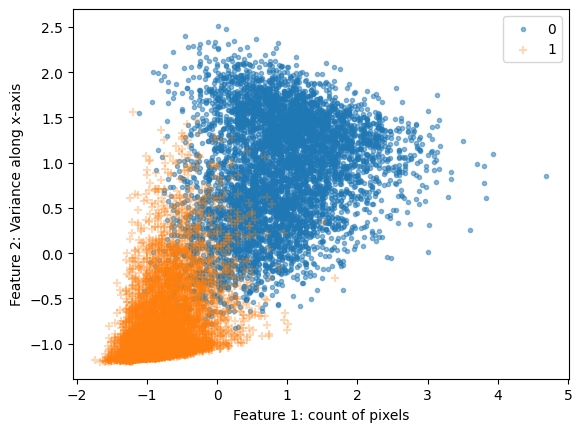

In [1]:
import numpy as np
import matplotlib.pyplot as plt
### Code to the get the data
! if [ ! -f zero_one_train_features.npz ]; then wget https://vikasdhiman.info/ECE490-S24-Neural-Networks/notebooks/05-mlp/zero_one_train_features.npz; fi
def feature_n_pxls(imgs):
    n, *shape = imgs.shape
    return np.sum(imgs[:, :, :].reshape(n, -1) > 128, axis=1)

def feature_y_var(imgs):
    wts = imgs.mean(axis=-2)
    mean = (np.arange(imgs.shape[-2]) * wts).sum(axis=-1) / wts.sum(axis=-1)
    var = ((np.arange(imgs.shape[-2]) - mean[:, None])**2 * wts).sum(axis=-1) / wts.sum(axis=-1)
    return var

zero_one_train_features = np.load('zero_one_train_features.npz')
FEATURE_MEAN = zero_one_train_features['mean']
FEATURE_STD = zero_one_train_features['std']
features = zero_one_train_features['normed_features']
labels = zero_one_train_features['labels']


def feature_extraction(imgs):
    features = np.stack((feature_n_pxls(imgs),
                     feature_y_var(imgs)), axis=-1)
    return (features - FEATURE_MEAN) / FEATURE_STD

def draw_features(ax, zero_features, one_features):
    zf = ax.scatter(zero_features[:, 0], zero_features[:, 1], marker='.', label='0', alpha=0.5)
    of = ax.scatter(one_features[:, 0], one_features[:, 1], marker='+', label='1', alpha=0.3)
    ax.legend()
    ax.set_xlabel('Feature 1: count of pixels')
    ax.set_ylabel('Feature 2: Variance along x-axis')
    return [zf, of] # return list of artists

fig, ax = plt.subplots()
draw_features(ax, features[labels > 0, :], features[labels < 0, :])


### Download manually or automatically

Download micrtorch.py and micrtorch_nn.py to the current directory or let the code do it for you below

In [2]:
import numpy as np
def wget(url, filename):
    """
    Download files using requests package
    """
    try:
        import requests
    except ImportError:
        import subprocess
        subprocess.call("pip install --user requests".split())
        import requests
    r = requests.get(url)
    with open(filename, 'wb') as fd:
        for chunk in r.iter_content():
            fd.write(chunk)
    
try:
    import microtorch as t
except ImportError:
    wget('https://vikasdhiman.info/ECE490-S24-Neural-Networks/notebooks/05-mlp/microtorch.py',
         'microtorch.py')
    import microtorch as t
    
try:
    import microtorch_nn as tnn
except ImportError:
    wget('https://vikasdhiman.info/ECE490-S24-Neural-Networks/notebooks/05-mlp/microtorch_nn.py',
         'microtorch_nn.py')
    import microtorch_nn as tnn

loss: 365.3770, delta loss: -5464.2455,train misclassified: 0.0602
loss: 281.9254, delta loss: -83.4515,train misclassified: 0.0519
loss: 234.6852, delta loss: -47.2402,train misclassified: 0.0470
loss: 205.1300, delta loss: -29.5552,train misclassified: 0.0461
loss: 184.7378, delta loss: -20.3922,train misclassified: 0.0451
loss: 170.0449, delta loss: -14.6929,train misclassified: 0.0450
loss: 158.8310, delta loss: -11.2139,train misclassified: 0.0448
loss: 149.7154, delta loss: -9.1157,train misclassified: 0.0452
loss: 141.7955, delta loss: -7.9199,train misclassified: 0.0450
loss: 134.5861, delta loss: -7.2093,train misclassified: 0.0450
loss: 127.9570, delta loss: -6.6292,train misclassified: 0.0447
loss: 121.7886, delta loss: -6.1684,train misclassified: 0.0447
loss: 115.8758, delta loss: -5.9128,train misclassified: 0.0447
loss: 110.1343, delta loss: -5.7415,train misclassified: 0.0448
loss: 104.5607, delta loss: -5.5736,train misclassified: 0.0450
loss: 99.1612, delta loss: -5.3

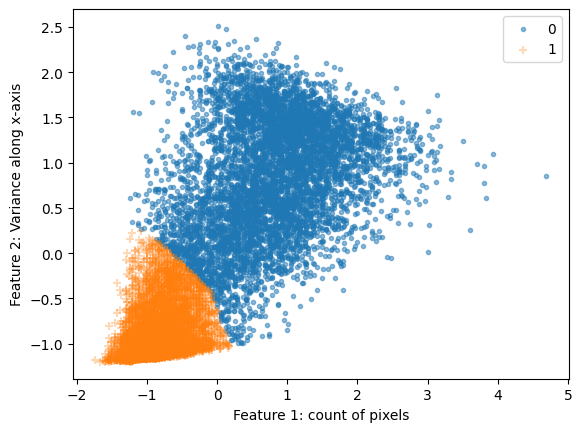

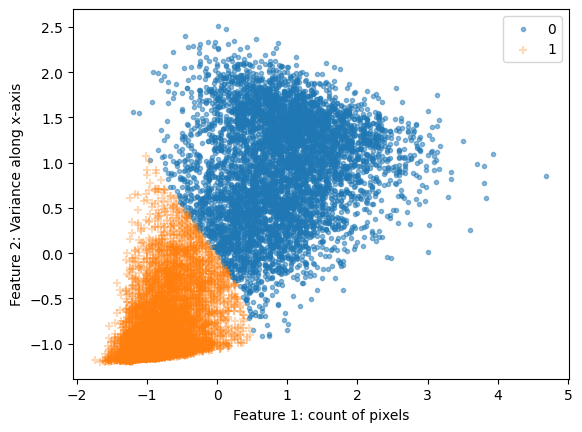

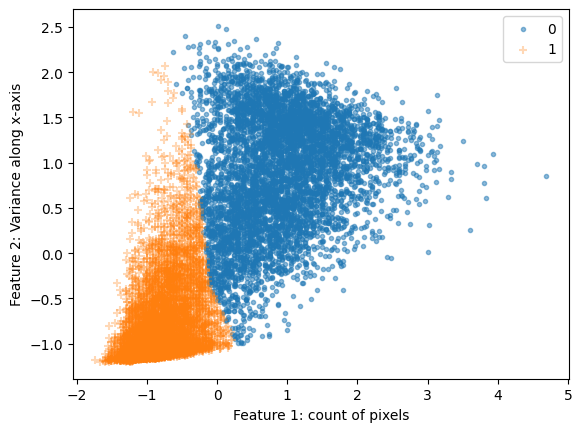

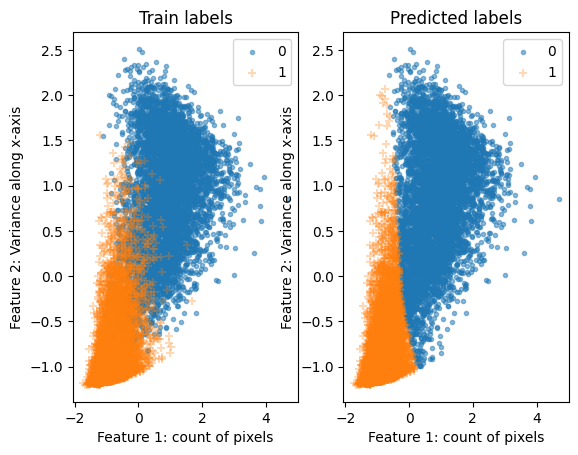

In [3]:
def loss(predicted_labels, true_labels):
    # Make sure predicted_labels and true_labels have same shape
    ### BEGIN SOLUTION
    y = true_labels[..., None]
    yhat = predicted_labels
    assert y.shape == yhat.shape
    return t.maximum(- y * yhat, 0).sum()# / y.shape[-1]
    ### END SOLUTION

# TODO:
# Define model = ?
### BEGIN SOLUTION
model = tnn.Sequential(
    tnn.Linear(2, 5),
    tnn.ReLU(),
    tnn.Linear(5, 1))
### END SOLUTION

def train_by_gradient_descent(model, loss, train_features, train_labels, lr=0.0001):
    train_features_tensor = t.Tensor(train_features)
    predicted_labels = model(train_features_tensor)
    #print(predicted_labels)
    
    loss_t = loss(predicted_labels, train_labels)
    loss_t.backward(1)
    loss_t_minus_1 = 2*loss_t.value  # Fake  value to make the while test pass once
    niter = 0
    while np.abs(loss_t.value - loss_t_minus_1) / loss_t.value > 0.01: # Stopping criterion
        for param in model.parameters():
            assert param.grad is not None
            #print("before:", id(param))
            param.value = param.value - lr * param.grad  # Gradient descent
            #print("after:", id(param))
        loss_t.zero_grad()
        # Recompute the gradients
        predicted_labels = model(train_features_tensor)
        loss_t_minus_1 = loss_t.value
        loss_t = loss(predicted_labels, train_labels)
        loss_t.backward(1) # Compute gradients for next iteration
        
        # If loss increased, decrease lr. Works for gradient descent, not for stochatic gradient descent.
        if loss_t.value > loss_t_minus_1:
            lr = lr / 2
        
        ### DEBUGing information
        iswrong = (train_labels * predicted_labels.value.ravel()) < 0
        misclassified = (iswrong).sum() / iswrong.shape[0]
        print(f"loss: {loss_t.value:04.04f}, delta loss: {loss_t.value - loss_t_minus_1:04.04f}," 
              f"train misclassified: {misclassified:04.04f}")
        if niter % 20 == 0: # plot every 20th iteration
            fig, ax = plt.subplots(1,1)
            draw_features(ax, 
                          train_features[predicted_labels.value.ravel() > 0, :], 
                          train_features[predicted_labels.value.ravel() < 0, :])
        
        
        niter += 1
    return model

trained_model = train_by_gradient_descent(model, loss, features, labels)


fig, axes = plt.subplots(1,2)
draw_features(axes[0], features[labels > 0, :], features[labels < 0, :])
axes[0].set_title('Train labels')
predicted_labels = trained_model(features).value.flatten()
draw_features(axes[1], features[predicted_labels > 0, :], features[predicted_labels < 0, :])
axes[1].set_title('Predicted labels');

In [4]:
# Download MNIST dataset
!F=t10k-images-idx3-ubyte && mkdir -p data && cd data && \
    [ ! -f $F ] && \
    wget http://yann.lecun.com/exdb/mnist/$F.gz  && \
    gunzip $F.gz
!F=t10k-labels-idx1-ubyte && mkdir -p data && cd data && \
    [ ! -f $F ] && \
    wget http://yann.lecun.com/exdb/mnist/$F.gz  && \
    gunzip $F.gz

--2024-04-01 18:23:54--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1648877 (1.6M) [application/x-gzip]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 100%[===================>]   1.57M  --.-KB/s    in 0.01s   

2024-04-01 18:23:54 (114 MB/s) - ‘t10k-images-idx3-ubyte.gz’ saved [1648877/1648877]

--2024-04-01 18:23:54--  http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4542 (4.4K) [application/x-gzip]
Saving to: ‘t10k-labels-idx1-ubyte.gz’

t10k-labels-idx1-ub 100%[===============

In [5]:
# Load MNIST dataset from uint8 byte files
import struct
import numpy as np

# Ref:https://github.com/sorki/python-mnist/blob/master/mnist/loader.py
def mnist_read_labels(fname='data/train-labels-idx1-ubyte'):
    with open(fname, 'rb') as file:
        # The file starts with 4 byte 2 unsigned ints 
        magic, size = struct.unpack('>II', file.read(8))
        assert magic == 2049
        labels = np.frombuffer(file.read(), dtype='u1')
        return labels
    
# Ref:https://github.com/sorki/python-mnist/blob/master/mnist/loader.py
def mnist_read_images(fname='data/train-images-idx3-ubyte'):
    with open(fname, 'rb') as file:
        # The file starts with 4 byte 4 unsigned ints 
        magic, size, rows, cols = struct.unpack('>IIII', file.read(16))
        assert magic == 2051
        image_data = np.frombuffer(file.read(), dtype='u1')
        images = image_data.reshape(size, rows, cols)
        return images
test_images = mnist_read_images('data/t10k-images-idx3-ubyte')
test_labels = mnist_read_labels('data/t10k-labels-idx1-ubyte')
zero_one_filter = (test_labels == 0) | (test_labels == 1)
zero_one_test_images = test_images[zero_one_filter, ...]
zero_one_test_labels = test_labels[zero_one_filter, ...]


def returnclasslabel(test_imgs):
    Xtest = feature_extraction(test_imgs)
    return np.where(
        trained_model(Xtest).value.ravel() > 0, 
        0,
        1)
zero_one_predicted_labels = returnclasslabel(zero_one_test_images)

# Find test_accuracy = ? 
### BEGIN SOLUTION
test_accuracy = np.sum(zero_one_test_labels == zero_one_predicted_labels) / len(zero_one_test_labels)

### END SOLUTION
print(test_accuracy)
assert test_accuracy > 0.90

0.9522458628841608
